# ENTREGABLE 2

# INSTRUCCIONES

Realizar la segunda fase del análisis exploratorio usando el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [5]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [3]:
ruta = "dataset_banco_clean.csv"
data = pd.read_csv(ruta)

In [4]:
print(data.shape)
data.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

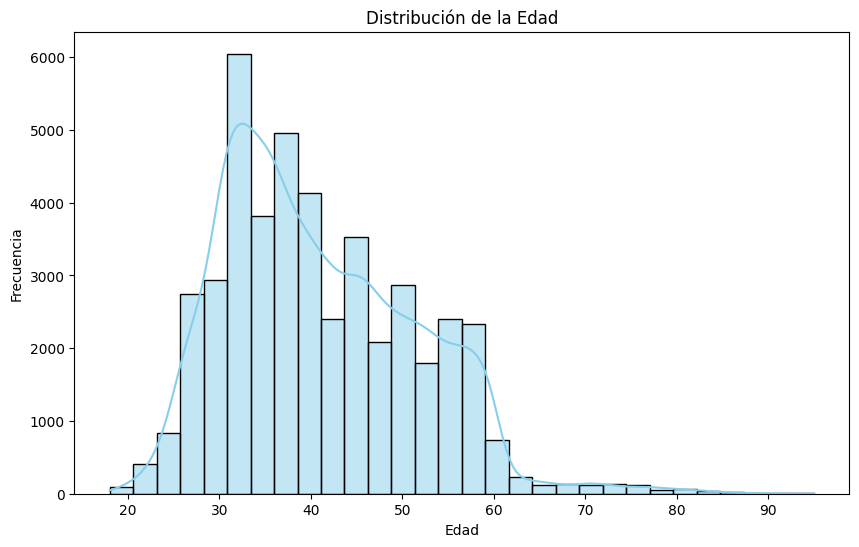

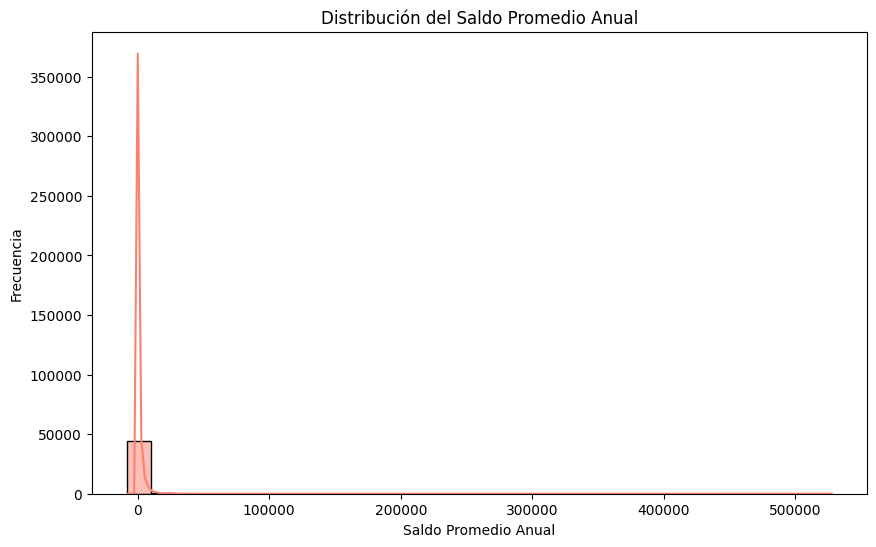

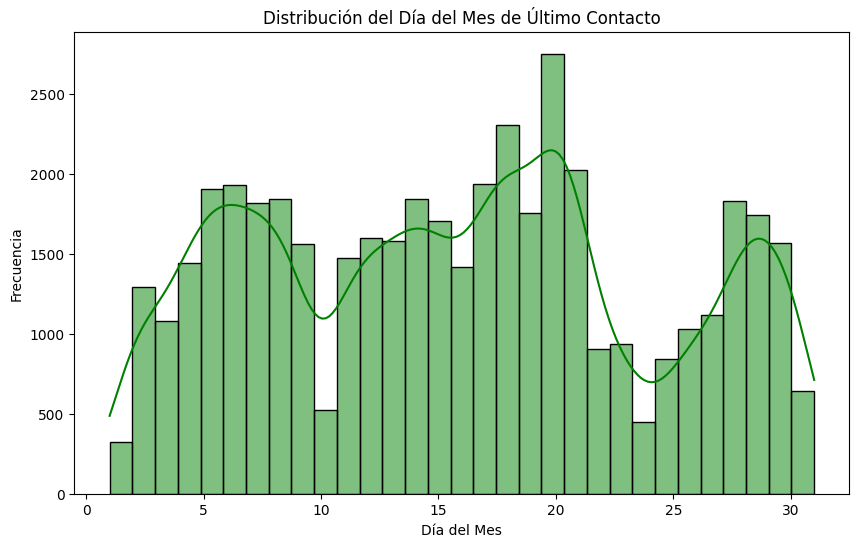

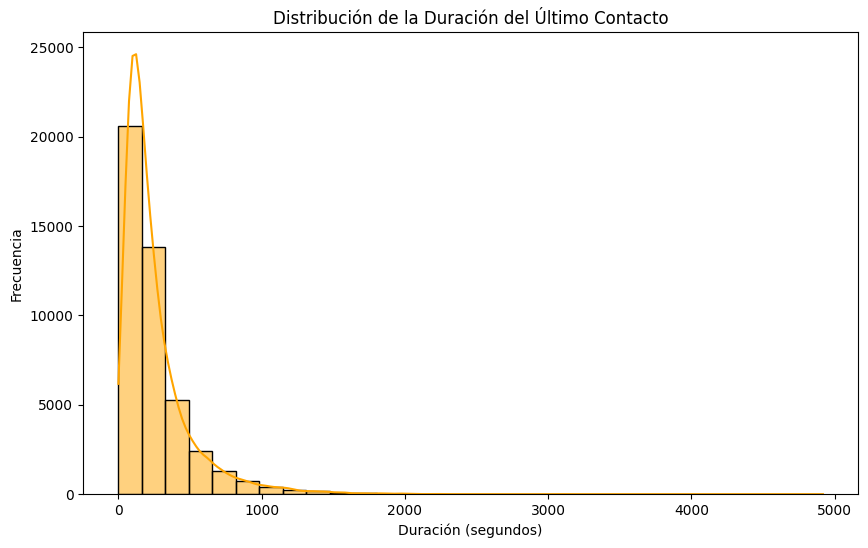

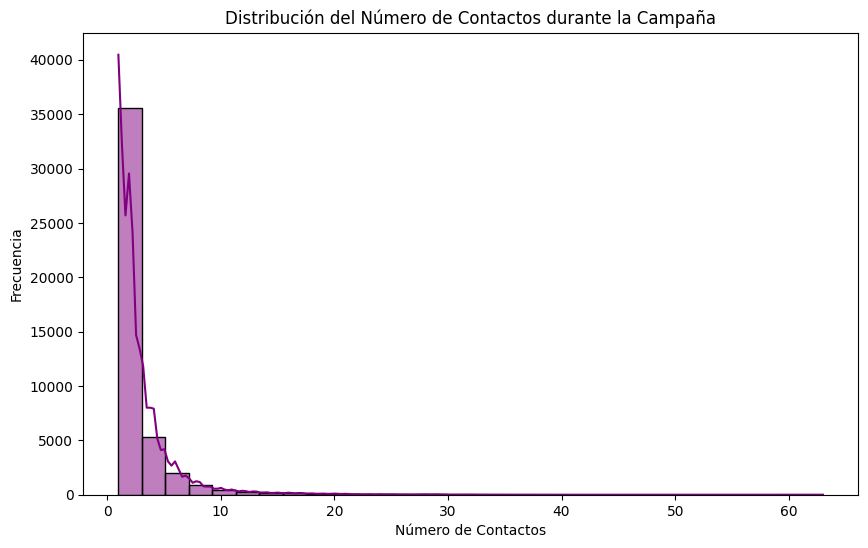

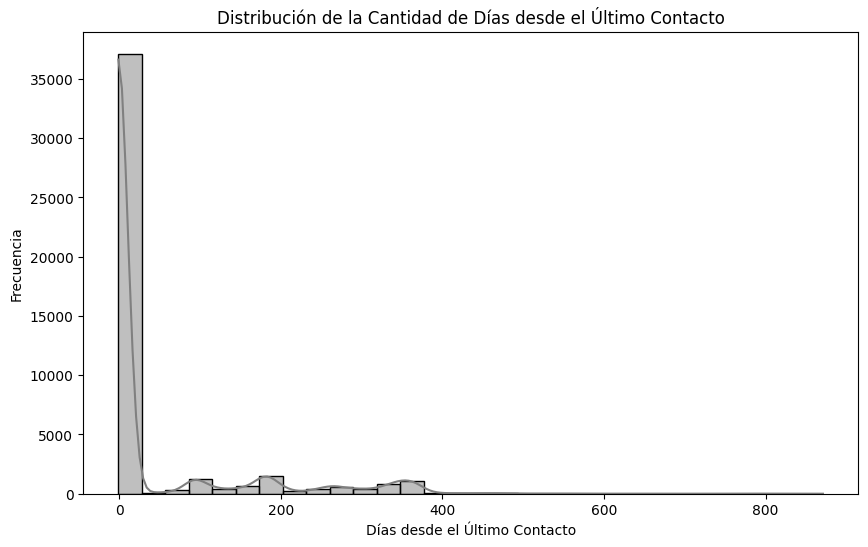

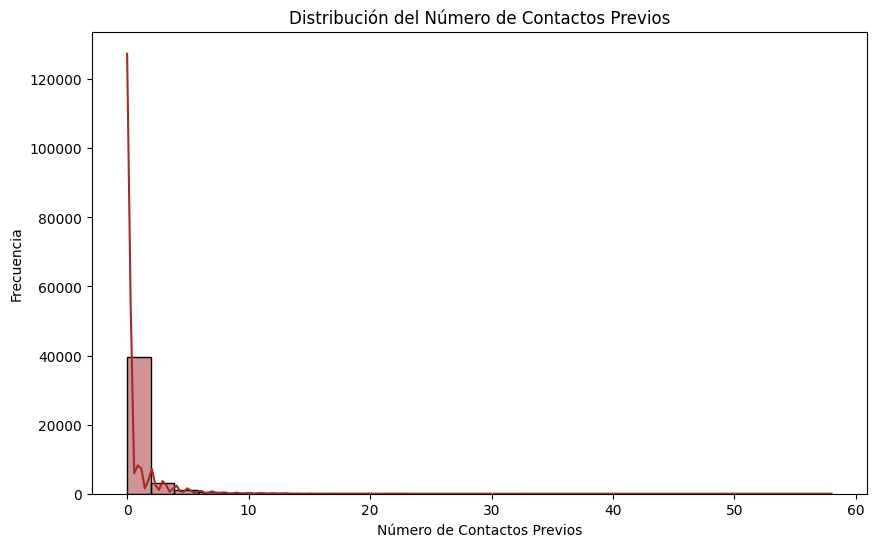

In [6]:
# Resumen estadístico de las variables numéricas
data.describe()

# Visualización de la distribución de la variable 'age'
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de la variable 'balance'
plt.figure(figsize=(10, 6))
sns.histplot(data['balance'], bins=30, kde=True, color='salmon')
plt.title('Distribución del Saldo Promedio Anual')
plt.xlabel('Saldo Promedio Anual')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de la variable 'day'
plt.figure(figsize=(10, 6))
sns.histplot(data['day'], bins=31, kde=True, color='green')
plt.title('Distribución del Día del Mes de Último Contacto')
plt.xlabel('Día del Mes')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de la variable 'duration'
plt.figure(figsize=(10, 6))
sns.histplot(data['duration'], bins=30, kde=True, color='orange')
plt.title('Distribución de la Duración del Último Contacto')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de la variable 'campaign'
plt.figure(figsize=(10, 6))
sns.histplot(data['campaign'], bins=30, kde=True, color='purple')
plt.title('Distribución del Número de Contactos durante la Campaña')
plt.xlabel('Número de Contactos')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de la variable 'pdays'
plt.figure(figsize=(10, 6))
sns.histplot(data['pdays'], bins=30, kde=True, color='gray')
plt.title('Distribución de la Cantidad de Días desde el Último Contacto')
plt.xlabel('Días desde el Último Contacto')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de la variable 'previous'
plt.figure(figsize=(10, 6))
sns.histplot(data['previous'], bins=30, kde=True, color='brown')
plt.title('Distribución del Número de Contactos Previos')
plt.xlabel('Número de Contactos Previos')
plt.ylabel('Frecuencia')
plt.show()

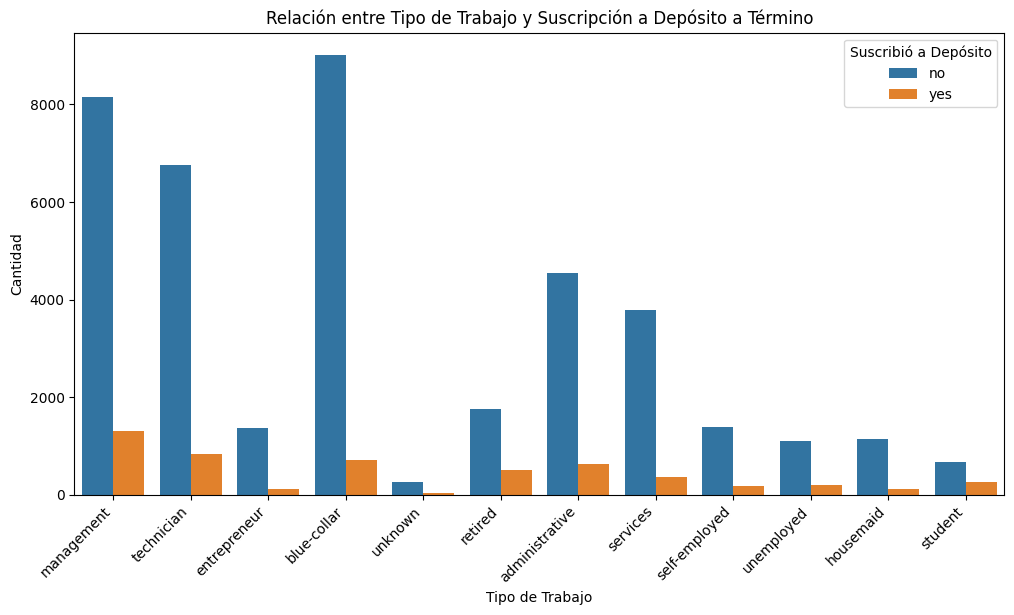

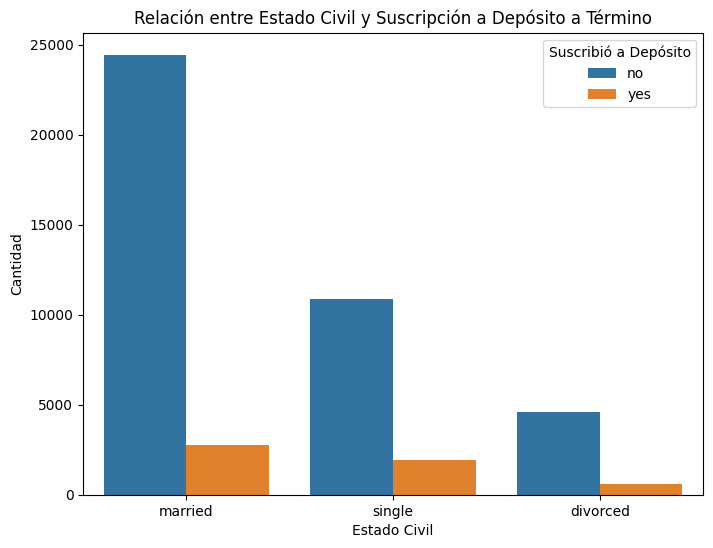

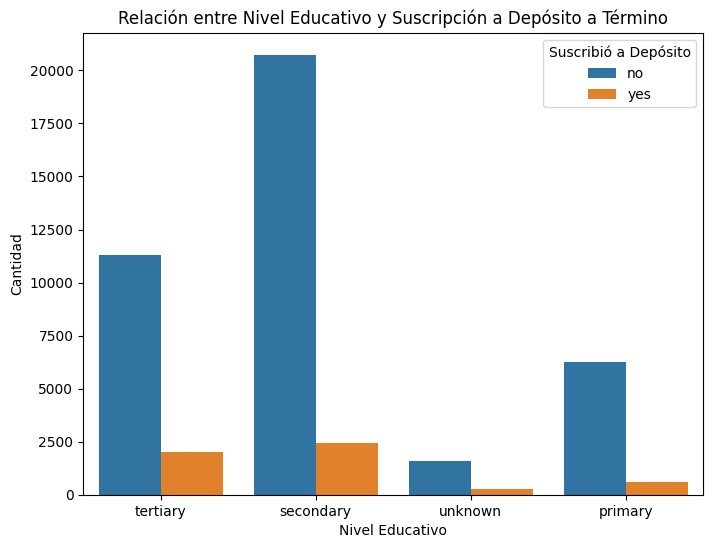

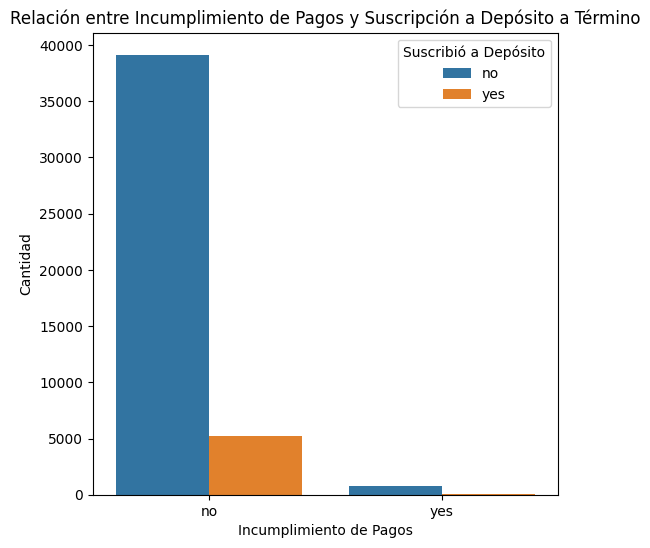

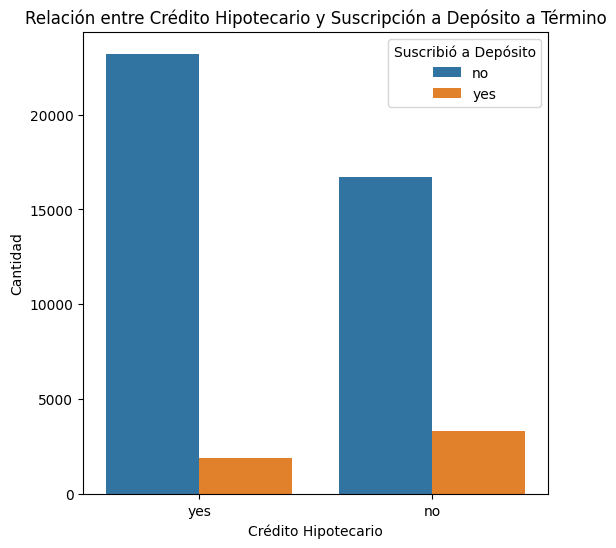

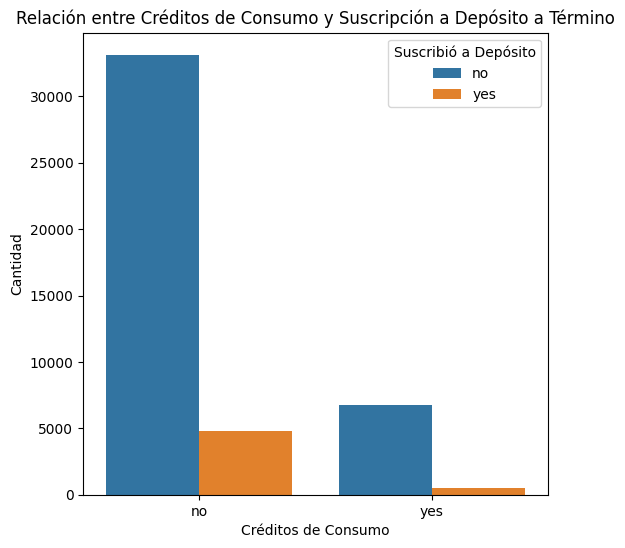

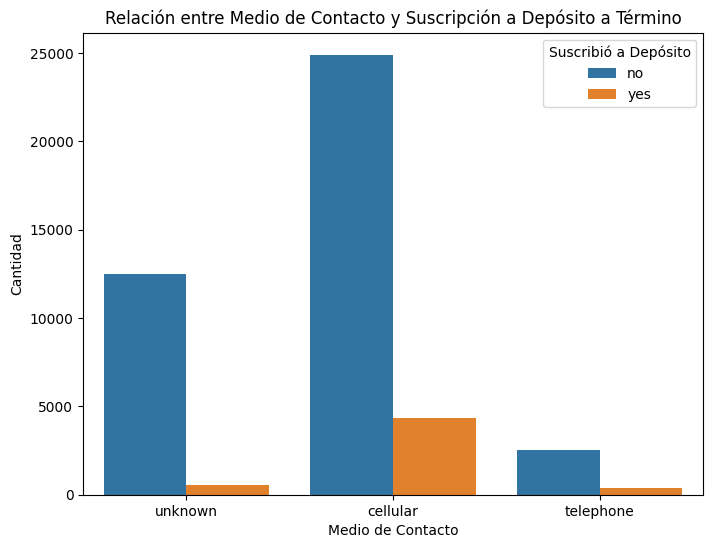

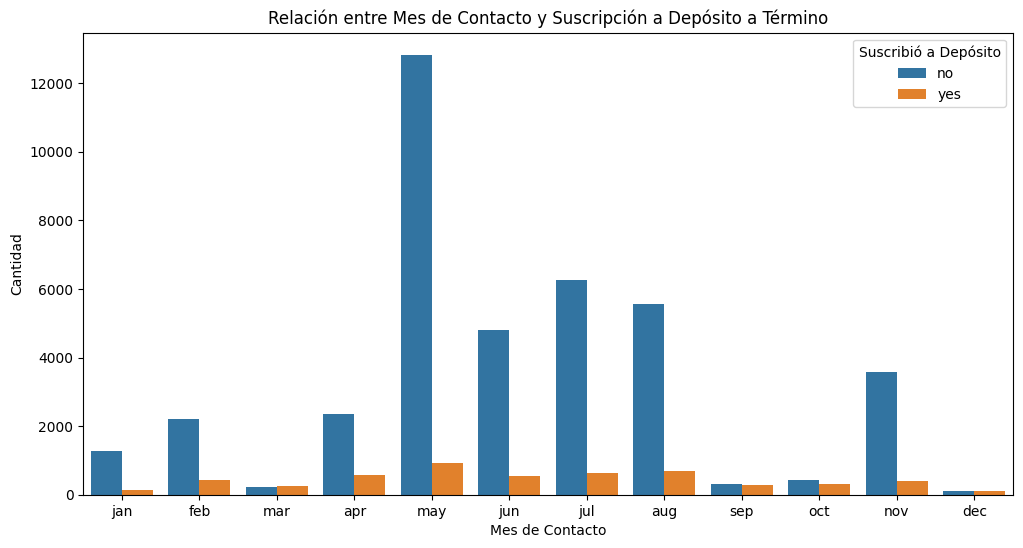

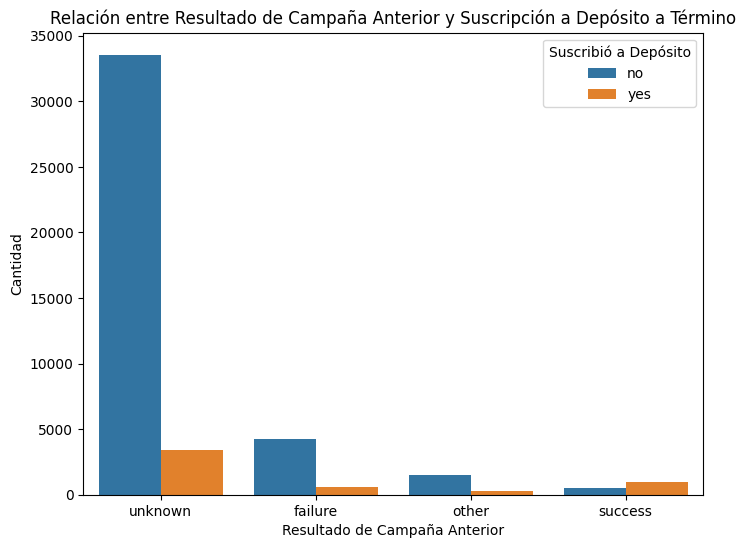

In [7]:
# Relación entre la variable 'job' y la variable a predecir 'y'
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='job', hue='y')
plt.title('Relación entre Tipo de Trabajo y Suscripción a Depósito a Término')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Suscribió a Depósito', loc='upper right')
plt.show()

# Relación entre la variable 'marital' y la variable a predecir 'y'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='marital', hue='y')
plt.title('Relación entre Estado Civil y Suscripción a Depósito a Término')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad')
plt.legend(title='Suscribió a Depósito', loc='upper right')
plt.show()

# Relación entre la variable 'education' y la variable a predecir 'y'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='education', hue='y')
plt.title('Relación entre Nivel Educativo y Suscripción a Depósito a Término')
plt.xlabel('Nivel Educativo')
plt.ylabel('Cantidad')
plt.legend(title='Suscribió a Depósito', loc='upper right')
plt.show()

# Relación entre la variable 'default' y la variable a predecir 'y'
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='default', hue='y')
plt.title('Relación entre Incumplimiento de Pagos y Suscripción a Depósito a Término')
plt.xlabel('Incumplimiento de Pagos')
plt.ylabel('Cantidad')
plt.legend(title='Suscribió a Depósito', loc='upper right')
plt.show()

# Relación entre la variable 'housing' y la variable a predecir 'y'
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='housing', hue='y')
plt.title('Relación entre Crédito Hipotecario y Suscripción a Depósito a Término')
plt.xlabel('Crédito Hipotecario')
plt.ylabel('Cantidad')
plt.legend(title='Suscribió a Depósito', loc='upper right')
plt.show()

# Relación entre la variable 'loan' y la variable a predecir 'y'
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='loan', hue='y')
plt.title('Relación entre Créditos de Consumo y Suscripción a Depósito a Término')
plt.xlabel('Créditos de Consumo')
plt.ylabel('Cantidad')
plt.legend(title='Suscribió a Depósito', loc='upper right')
plt.show()

# Relación entre la variable 'contact' y la variable a predecir 'y'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='contact', hue='y')
plt.title('Relación entre Medio de Contacto y Suscripción a Depósito a Término')
plt.xlabel('Medio de Contacto')
plt.ylabel('Cantidad')
plt.legend(title='Suscribió a Depósito', loc='upper right')
plt.show()

# Relación entre la variable 'month' y la variable a predecir 'y'
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='month', hue='y', order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Relación entre Mes de Contacto y Suscripción a Depósito a Término')
plt.xlabel('Mes de Contacto')
plt.ylabel('Cantidad')
plt.legend(title='Suscribió a Depósito', loc='upper right')
plt.show()

# Relación entre la variable 'poutcome' y la variable a predecir 'y'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='poutcome', hue='y')
plt.title('Relación entre Resultado de Campaña Anterior y Suscripción a Depósito a Término')
plt.xlabel('Resultado de Campaña Anterior')
plt.ylabel('Cantidad')
plt.legend(title='Suscribió a Depósito', loc='upper right')
plt.show()

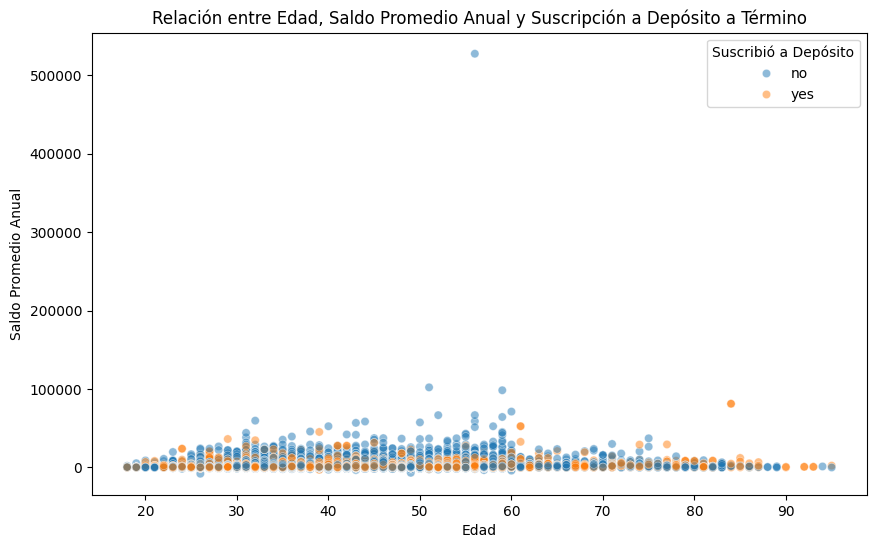

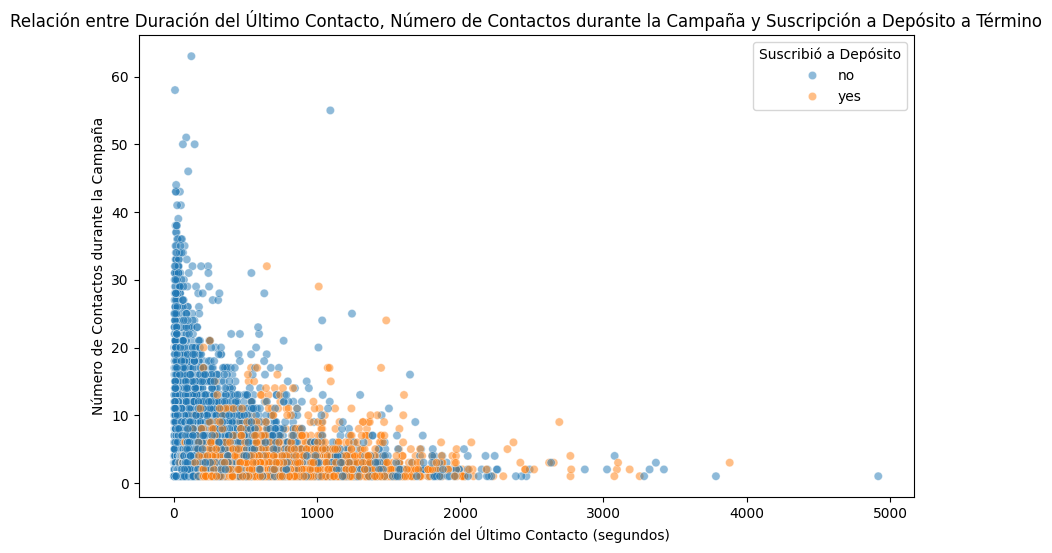

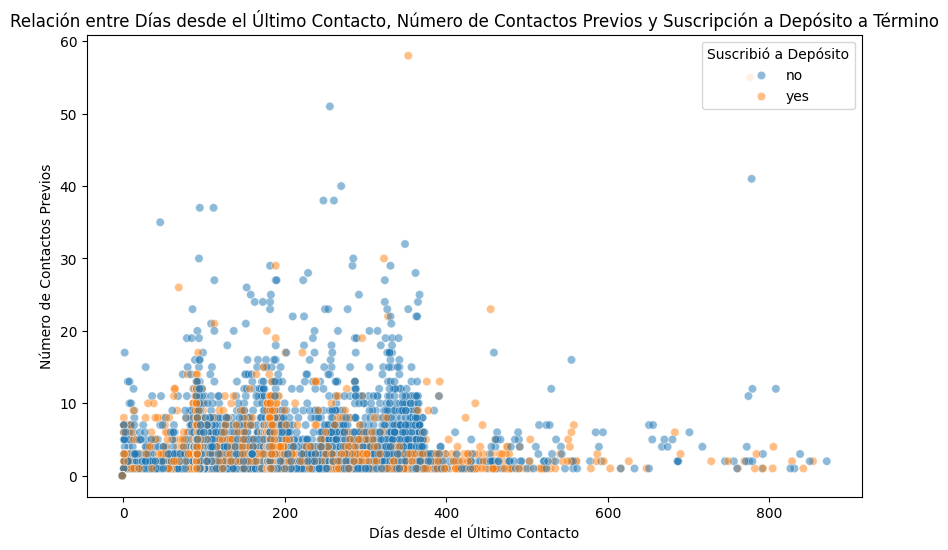

In [8]:
# Relación entre las variables 'age' y 'balance' con la variable a predecir 'y'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='balance', hue='y', alpha=0.5)
plt.title('Relación entre Edad, Saldo Promedio Anual y Suscripción a Depósito a Término')
plt.xlabel('Edad')
plt.ylabel('Saldo Promedio Anual')
plt.legend(title='Suscribió a Depósito', loc='upper right')
plt.show()

# Relación entre las variables 'duration' y 'campaign' con la variable a predecir 'y'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='duration', y='campaign', hue='y', alpha=0.5)
plt.title('Relación entre Duración del Último Contacto, Número de Contactos durante la Campaña y Suscripción a Depósito a Término')
plt.xlabel('Duración del Último Contacto (segundos)')
plt.ylabel('Número de Contactos durante la Campaña')
plt.legend(title='Suscribió a Depósito', loc='upper right')
plt.show()

# Relación entre las variables 'pdays' y 'previous' con la variable a predecir 'y'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='pdays', y='previous', hue='y', alpha=0.5)
plt.title('Relación entre Días desde el Último Contacto, Número de Contactos Previos y Suscripción a Depósito a Término')
plt.xlabel('Días desde el Último Contacto')
plt.ylabel('Número de Contactos Previos')
plt.legend(title='Suscribió a Depósito', loc='upper right')
plt.show()